Let´s display an example slize of a CT scan in the LUNA16 dataset

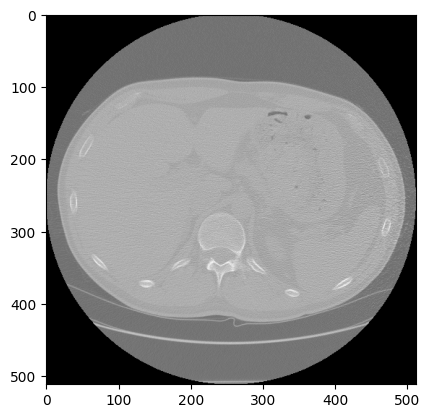

In [3]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load the .mhd file
image = sitk.ReadImage('/home/ec2-user/luna16/subset0_unzipped/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd')

# Convert to numpy array for plotting (if it's 2D data)
image_array = sitk.GetArrayFromImage(image)

# Visualize the image (for a 2D slice)
plt.imshow(image_array[0], cmap='gray')
plt.show()

So the LUNA16 dataset contains CT scans of lungs. CT scans use X-rays to create detailed cross-sectional images/slices of the body. Together they can be stacked to form a 3D representation of the body - which can help in e.g. detecting and diagnosing cancer. The primary purpose of this particular dataset is the detection of lung nodules that can potentionally be cancerous. 

For this particular project I have chosen to try the 3D U Net model and to finetune by freezing some of the first layers and then train the remaining layers using the LUNA16 data. In the original dataset we have 10 subsets containing a total of 888 CT scans. Each subset seems to be approximately 12 GB large. I can only save 5GB in S3 due to the limitations of the AWS free tier (and I want to avoid getting billed). I think I could move forward and do all the training and testing here in this EC2 instance but I want to learn how to go through the whole MLOps cycle by e.g. easing SageMaker to train the model, using S3 and then also CloudWatch e.g. for monitoring. So let´s do some preprocessing here using this EC2 instance and then store the preprocessed data (less than 5GB) in an S3 bucket. I think I want to try to keep all the CT scans in this subset, so I need to find a way to preprocess the data where I lose some information but where I try to keep the most valuable information. This is not a grand research project so I´ll wont exhaust all options in the world to find an optimal method, but I´ll do my best in the time I have before I have to leave the café I´m sitting in. 

Just looking at the plot it seems like each slice is 512x512 large. Maybe I could reduce this to fewer pixels, or voxels (which I think is what the pixels represent, so the density in that particular area)? Maybe we can skip slices? Are the slices thin enough to mayble skip every second slice and still get a very detailed 3D representation, or will it look really strange? 

After 5 minutes of thinking about this and taking my medical ignorance into account I´ve decided to just keep a subset of the data (let´s say 4GB). As I will be doing finetuning I think it might be alright to not have that much data. We´ll see. And the main purpose of this project is to learn some ML Ops with AWS anyways. I still want to keep the same distribution, but that might be difficult now that I´m removing 2/3 of the data. Oh well. 

In [8]:
!find /home/ec2-user/luna16/subset0_unzipped/subset0 -type f -name "*.mhd" | wc -l

89


In [9]:
!find /home/ec2-user/luna16/subset0_unzipped/subset0 -type f -name "*.raw" | wc -l

89
